In [1]:
#Importing modules and data
#Lets start off by importing the various modules and datasets we will need in this notebook.

# Import the needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the main data sets
teams_df = pd.read_csv(r"C:\Users\rajuj\Desktop\highest_earning_teams.csv", sep=',')
players_df = pd.read_csv(r"C:\Users\rajuj\Desktop\highest_earning_players.csv", sep=',')

In [2]:
#Exploring teams data
#By constructing a pandas dataframe, we are able to easily perform operations on the data contained in the dataframe.
#Show teams data structure and data

teams_df.head

<bound method NDFrame.head of      TeamId               TeamName  TotalUSDPrize  TotalTournaments  \
0       760    San Francisco Shock      3105000.0                 7   
1       776        London Spitfire      1591136.5                13   
2       768     New York Excelsior      1572618.5                18   
3       773    Philadelphia Fusion      1186278.5                15   
4       766          Seoul Dynasty      1130000.0                 6   
..      ...                    ...            ...               ...   
923   24781         Rex Regum Qeon         6286.8                 2   
924     261               Alliance         4000.0                 1   
925     713        Marines Esports         3429.6                 1   
926     608  British National Team         2500.0                 1   
927     584  Swedish National Team         2500.0                 1   

               Game                            Genre  
0         Overwatch             First-Person Shooter  
1      

In [3]:
#I thought it would be interesting to see which games are included in the dataset.
#Show all the unique game included in the dataset

teams_df['Game'].unique()

array(['Overwatch', 'Starcraft II', 'League of Legends', 'Fortnite',
       'Counter-Strike: Global Offensive', 'Dota 2', 'PUBG',
       'Heroes of the Storm', 'Hearthstone', 'Arena of Valor'],
      dtype=object)

In [4]:
#I thought it would be interesting to show the five biggest esports teams by total prize winnings and additionaly calculate the total sum of prize money won by playing esports tournaments.
#Show the five largest teams by the amount of prize money they have won

teams_df.nlargest(5, 'TotalUSDPrize')

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
500,419,OG,33810636.13,68,Dota 2,Multiplayer Online Battle Arena
501,102,Team Liquid,22967431.10,96,Dota 2,Multiplayer Online Battle Arena
502,101,Evil Geniuses,19988670.62,115,Dota 2,Multiplayer Online Battle Arena
503,210,Newbee,13523736.43,98,Dota 2,Multiplayer Online Battle Arena
504,211,Team Secret,11492345.09,79,Dota 2,Multiplayer Online Battle Arena


In [5]:
#Show the sum of all prize money in the dataset, rounded to two decimals

round(teams_df['TotalUSDPrize'].sum(), 2)

501044203.9

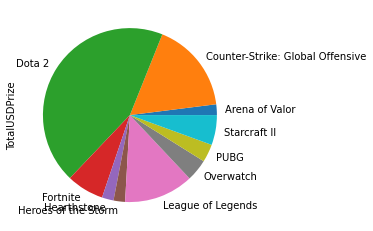

In [6]:
#I had the assumption that there were huge differences in the amount of prize money for certain games and a pie chart would be suitable to visualize the differences.
#Show a pie chart of all the different games and prize money sums in the dataset

earnings_per_game = teams_df.groupby(['Game'])['TotalUSDPrize'].sum()
earnings_per_game.plot(kind="pie")
plt.show()

In [7]:
#Personally, I was interested in finding out which esports teams were on average the most succesfull. By dividing the total amount of prize money won by the number of total tournaments played; We would be able to calculate the average amount of prize money winings per tournament for every team.
#Divide the total prize money by the number of tournaments
avg_earnings = teams_df['TotalUSDPrize'].div(teams_df['TotalTournaments'], axis='index')

#Add the team names and total tournaments played to the calculated averages
avg_earnings_df = pd.concat([teams_df['TeamName'], teams_df['TotalTournaments'], round(avg_earnings, 2)], axis=1)

#Name the colums
avg_earnings_df.columns = ['Team', 'TotalTournaments', 'AvgEarnings']

#Show the top 10 esport teams with the highest prize money averages
avg_earnings_df.nlargest(10, 'AvgEarnings')

,Team,TotalTournaments,AvgEarnings
880,eStar Gaming,5,522664.73
500,OG,68,497215.24
0,San Francisco Shock,7,443571.43
508,Wings Gaming,24,405801.97
529,Russian National Team,2,401000.00
509,Paris Saint-Germain Esports,27,335812.84
321,World Best Gaming,1,262500.00
311,9z Team,4,250237.50
16,Washington Justice,1,250000.00
501,Team Liquid,96,239244.07


In [8]:
#eStar Gaming seems to be particullary succesfull with an average prize winning of $522664,73 for every tournament they have played.

In [9]:
#Expore player data
#I am specifically interested in Counter-Strike: Global Offensive (CSGO) players as I play and watch this game a lot. First, I will explore the data in a general manner similar to what we did with the esports team data.

In [10]:
#Show players dataset structure and data
players_df.head

<bound method NDFrame.head of      PlayerId NameFirst   NameLast CurrentHandle CountryCode  TotalUSDPrize  \
0        3883     Peter  Rasmussen       dupreeh          dk     1822989.41   
1        3679   Andreas   Højsleth         Xyp9x          dk     1799288.57   
2        3885   Nicolai     Reedtz        dev1ce          dk     1787489.88   
3        3672     Lukas  Rossander        gla1ve          dk     1652350.75   
4       17800      Emil       Reif        Magisk          dk     1416448.64   
..        ...       ...        ...           ...         ...            ...   
995      7400     Janne   Mikkonen         Savjz          fi       50734.44   
996      3255      Drew  Biessener   Tidesoftime          us       50449.60   
997     49164    Simone    Liguori          Leta          it       49300.00   
998     43043      Mike    Eichner           Ike          us       48550.00   
999      1100   Jeffrey      Brusi          SjoW          se       47973.61   

                     

In [11]:
#It could be interesting to find out which countries have the most esports players.

#Count the number of players for each country
players_per_country = players_df['CountryCode'].value_counts()

#Select the top 10 countries with most players in the dataset
top10 = players_per_country.nlargest(10)
top10

kr    251
cn    168
us    114
se     45
ca     37
fr     37
dk     36
tw     34
de     30
th     29
Name: CountryCode, dtype: int64

In [12]:
#I expected that western countries such as the US and Germany would have a lot more esports players but apparently Korea and China have a lot of professional esports players. A visualization could help with understanding the differences.

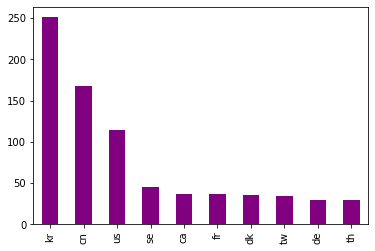

In [13]:
#Visualize the top 10 countries with most esport players in a bar plot.
top10.plot(kind="bar", color=['purple'])
plt.show()

In [14]:
#I thought about other details that could be interesting before diving deeper into the CSGO scene. The best player according to their earnings for every game could provide some insight in the differences between these games.

In [15]:
#Show the best earning player for every game in the dataset
players_df.groupby('Game').head(1)

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
100,3304,Johan,Sundstein,N0tail,dk,6952596.58,Dota 2,Multiplayer Online Battle Arena
200,3832,Sang Hyeok,Lee,Faker,kr,1257615.87,League of Legends,Multiplayer Online Battle Arena
300,56483,Kyle,Giersdorf,Bugha,us,3141395.05,Fortnite,Battle Royale
400,32000,Dong Jun,Kim,Rascal,kr,331108.68,Overwatch,First-Person Shooter
500,5513,Joona,Sotala,Serral,fi,893336.55,Starcraft II,Strategy
600,19968,Won Ho,Jeong,KyoCha,kr,464560.82,Heroes of the Storm,Multiplayer Online Battle Arena
700,48322,Jeong Yeong,Bak,Loki,kr,703953.94,PUBG,Battle Royale
800,60467,Zhengzheng,Chen,Cat,cn,465685.85,Arena of Valor,Multiplayer Online Battle Arena
900,7517,Thijs,Molendijk,Thijs,nl,491418.66,Hearthstone,Collectible Card Game


In [16]:
#Show the number of players for each game in the dataset
players_df['Game'].value_counts()

Counter-Strike: Global Offensive    100
Dota 2                              100
League of Legends                   100
Fortnite                            100
Overwatch                           100
Starcraft II                        100
Heroes of the Storm                 100
PUBG                                100
Arena of Valor                      100
Hearthstone                         100
Name: Game, dtype: int64

In [17]:
#Let's dive deeper into CSGO and the most succesfull players.

#Filter all the players that play CSGO
CSGO_players = players_df.loc[players_df['Game'] == 'Counter-Strike: Global Offensive']

#Show the first 10 CSGO players
CSGO_players.head(10)

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter
5,16800,Jakey,Yip,Stewie2k,us,1087340.00,Counter-Strike: Global Offensive,First-Person Shooter
6,12183,Epitácio,de Melo,TACO,br,1063858.27,Counter-Strike: Global Offensive,First-Person Shooter
7,12169,Fernando,Alvarenga,fer,br,1063038.92,Counter-Strike: Global Offensive,First-Person Shooter
8,2455,Gabriel,Toledo,FalleN,br,1059938.92,Counter-Strike: Global Offensive,First-Person Shooter
9,12182,Marcelo,David,coldzera,br,1021901.46,Counter-Strike: Global Offensive,First-Person Shooter


In [18]:
#The dataset misses the name of the team these players play for. I wanted to add a new column to store the current team a player plays for.

In [19]:
#Add a column to store the CSGO players current team
CSGO_players.insert(loc=8, column="CurrentTeam", value=['' for i in range(CSGO_players.shape[0])])

#Add team names to the top five CSGO players
CSGO_players.loc[0:4, 'CurrentTeam'] = "Astralis"
CSGO_players.loc[5, 'CurrentTeam'] = "Team Liquid"
CSGO_players.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre,CurrentTeam
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter,Astralis
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter,Astralis
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter,Astralis
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter,Astralis
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter,Astralis
5,16800,Jakey,Yip,Stewie2k,us,1087340.00,Counter-Strike: Global Offensive,First-Person Shooter,Team Liquid
6,12183,Epitácio,de Melo,TACO,br,1063858.27,Counter-Strike: Global Offensive,First-Person Shooter,
7,12169,Fernando,Alvarenga,fer,br,1063038.92,Counter-Strike: Global Offensive,First-Person Shooter,
8,2455,Gabriel,Toledo,FalleN,br,1059938.92,Counter-Strike: Global Offensive,First-Person Shooter,
9,12182,Marcelo,David,coldzera,br,1021901.46,Counter-Strike: Global Offensive,First-Person Shooter,


In [20]:
#To conclude this explorarty analysis, I wanted to visualize which countries CSGO players come from.

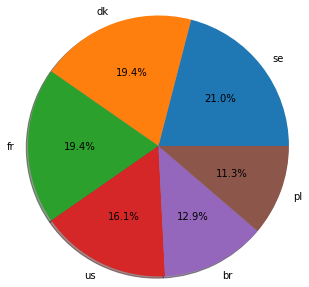

In [21]:
#Visualize the countries with more than five professional CSGO players in a pie chart
countries = CSGO_players['CountryCode'].value_counts()[CSGO_players['CountryCode'].value_counts() > 5]
plt.pie(countries, labels = countries.index, shadow = True, radius=1.5, autopct = '%1.1f%%')
plt.show()